In [20]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt

mall_data = pd.read_csv('dataset/Mall_Customers.csv')
mall_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# Drop unnecessary columns (e.g., customer ID)
mall_data = mall_data.drop(['CustomerID'], axis=1)

In [22]:

# Convert numerical columns to categorical if necessary
# (e.g., age_group based on age ranges)
mall_data['age_group'] = pd.cut(mall_data['Age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])


In [23]:
mall_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Young
4,Female,31,17,40,Middle-aged


In [24]:
# Select categorical features for clustering
# (e.g., gender, age_group)
categorical_features = ['Gender', 'age_group']

In [25]:
categorical_features

['Gender', 'age_group']

In [26]:
# Label encode categorical features

from sklearn.preprocessing import LabelEncoder

mall_data_encoded = mall_data.copy()
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    mall_data_encoded[feature] = label_encoders[feature].fit_transform(mall_data_encoded[feature])


In [27]:
mall_data_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,0
197,1,32,126,74,0
198,1,32,137,18,0


In [28]:
# Combine numerical features (if any)
numerical_features = ['Annual Income (k$)', 'Spending Score (1-100)']



In [29]:
# Initialize KPrototypes with desired number of clusters
k = 5  # Example: 5 clusters
kp = KPrototypes(n_clusters=k, init='Cao', verbose=2)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [30]:
# Fit the model to the data
clusters = kp.fit_predict(mall_data_encoded, categorical=list(range(len(categorical_features))))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20, ncost: 56369.30370145129
Run: 1, iteration: 2/100, moves: 18, ncost: 49974.7285640514
Run: 1, iteration: 3/100, moves: 12, ncost: 47039.8005482791
Run: 1, iteration: 4/100, moves: 3, ncost: 46895.79464636488


Run: 1, iteration: 5/100, moves: 0, ncost: 46895.79464636488
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 26, ncost: 48204.62109631205
Run: 2, iteration: 2/100, moves: 8, ncost: 46911.62833112826
Run: 2, iteration: 3/100, moves: 0, ncost: 46911.62833112826
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 55, ncost: 77075.63858268024
Run: 3, iteration: 2/100, moves: 20, ncost: 56322.72219860807
Run: 3, iteration: 3/100, moves: 17, ncost: 47896.36932297545
Run: 3, iteration: 4/100, moves: 9, ncost: 46911.62833112827
Run: 3, iteration: 5/100, moves: 0, ncost: 46911.62833112827
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 47, ncost: 63896.3116360775
Run: 4, iteration: 2/100, moves: 17, ncost: 51547.84294643438
Run: 4, iteration: 3/100, moves: 10, ncost: 46922.29654685179
Run: 4, iteration: 4/1

In [31]:

# Add cluster labels to the original dataset
mall_data['cluster'] = clusters

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

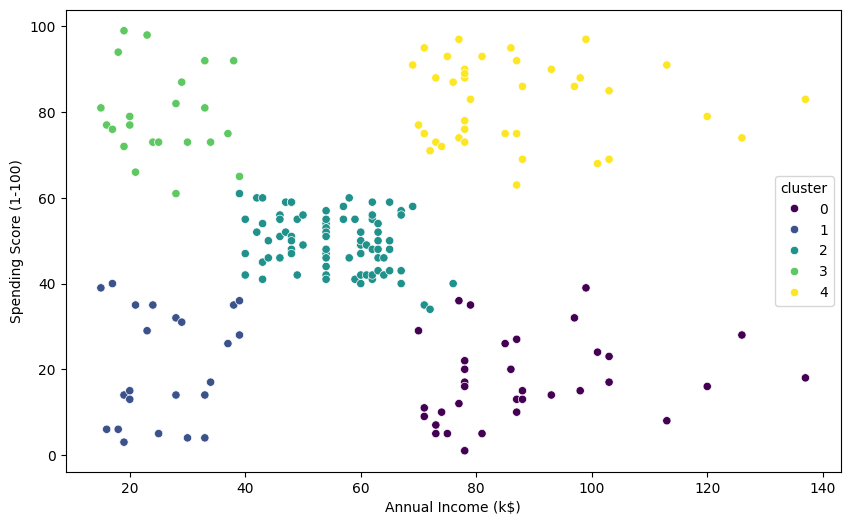

In [32]:


# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=mall_data, palette='viridis', legend='full')
